In [10]:
# %pip install datasets
# %pip install ipywidgets
# %pip install Pillow
# %pip install --upgrade pip
# %pip install matplotlib
%pip install torch
%pip install torchvision
%pip install transformers
%pip install roboflow
%pip install ultralytics
%pip install label-studio


Python(18969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


Python(18978) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


Python(18986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


Python(18987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


Python(18995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


Python(18996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached protobuf-6.33.2-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached grpcio-1.76.

In [5]:


from roboflow import Roboflow
import os

# 1. Vul hier je eigen API key in
rf = Roboflow(api_key="pqwTCxm9lETPyMHK0ePD")

# 2. Maak verbinding met het project dat je vond
project = rf.workspace("parking-amu50").project("illegal-parking")
version = project.version(5)

# 3. Download de data in YOLOv8 formaat (dit is het meest gangbaar voor lokale training)
# De data wordt nu FYSIEK op jouw computer opgeslagen.
dataset = version.download("yolov8")

print(f"De foto's staan nu lokaal in: {dataset.location}")

loading Roboflow workspace...
loading Roboflow project...
De foto's staan nu lokaal in: /Users/merlijne/Documents/Studie/Master_DS/DSP/Project5DSP/image-classifier-web/code/Illegal-Parking-5


In [ ]:
from datasets import load_dataset
from ultralytics import YOLO


model = YOLO('yolov8n.pt') 

model.train(
    data=f"{dataset.location}/data.yaml", 
    epochs=25, 
    imgsz=640, 
    device='mps'  
)

Ultralytics 8.3.248 🚀 Python-3.13.3 torch-2.9.1 MPS (Apple M1)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/merlijne/Documents/Studie/Master_DS/DSP/Project5DSP/image-classifier-web/code/Illegal-Parking-5/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x34f62a3c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

# Het pad uit jouw resultaten
save_dir = Path('/Users/merlijne/Documents/Studie/Master_DS/DSP/Project5DSP/runs/detect/train2')

# Toon de belangrijkste grafieken naast elkaar
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# 1. Confusion Matrix (Laat zien waar de AI de mist in gaat)
if (save_dir / 'confusion_matrix.png').exists():
    ax[0].imshow(mpimg.imread(save_dir / 'confusion_matrix.png'))
    ax[0].set_title("Confusion Matrix")
    ax[0].axis('off')

# 2. Results (De leercurve)
if (save_dir / 'results.png').exists():
    ax[1].imshow(mpimg.imread(save_dir / 'results.png'))
    ax[1].set_title("Training Results")
    ax[1].axis('off')

plt.show()

<Figure size 2000x1000 with 2 Axes>

--- Confusion Matrix (Waar de AI de mist in gaat) ---


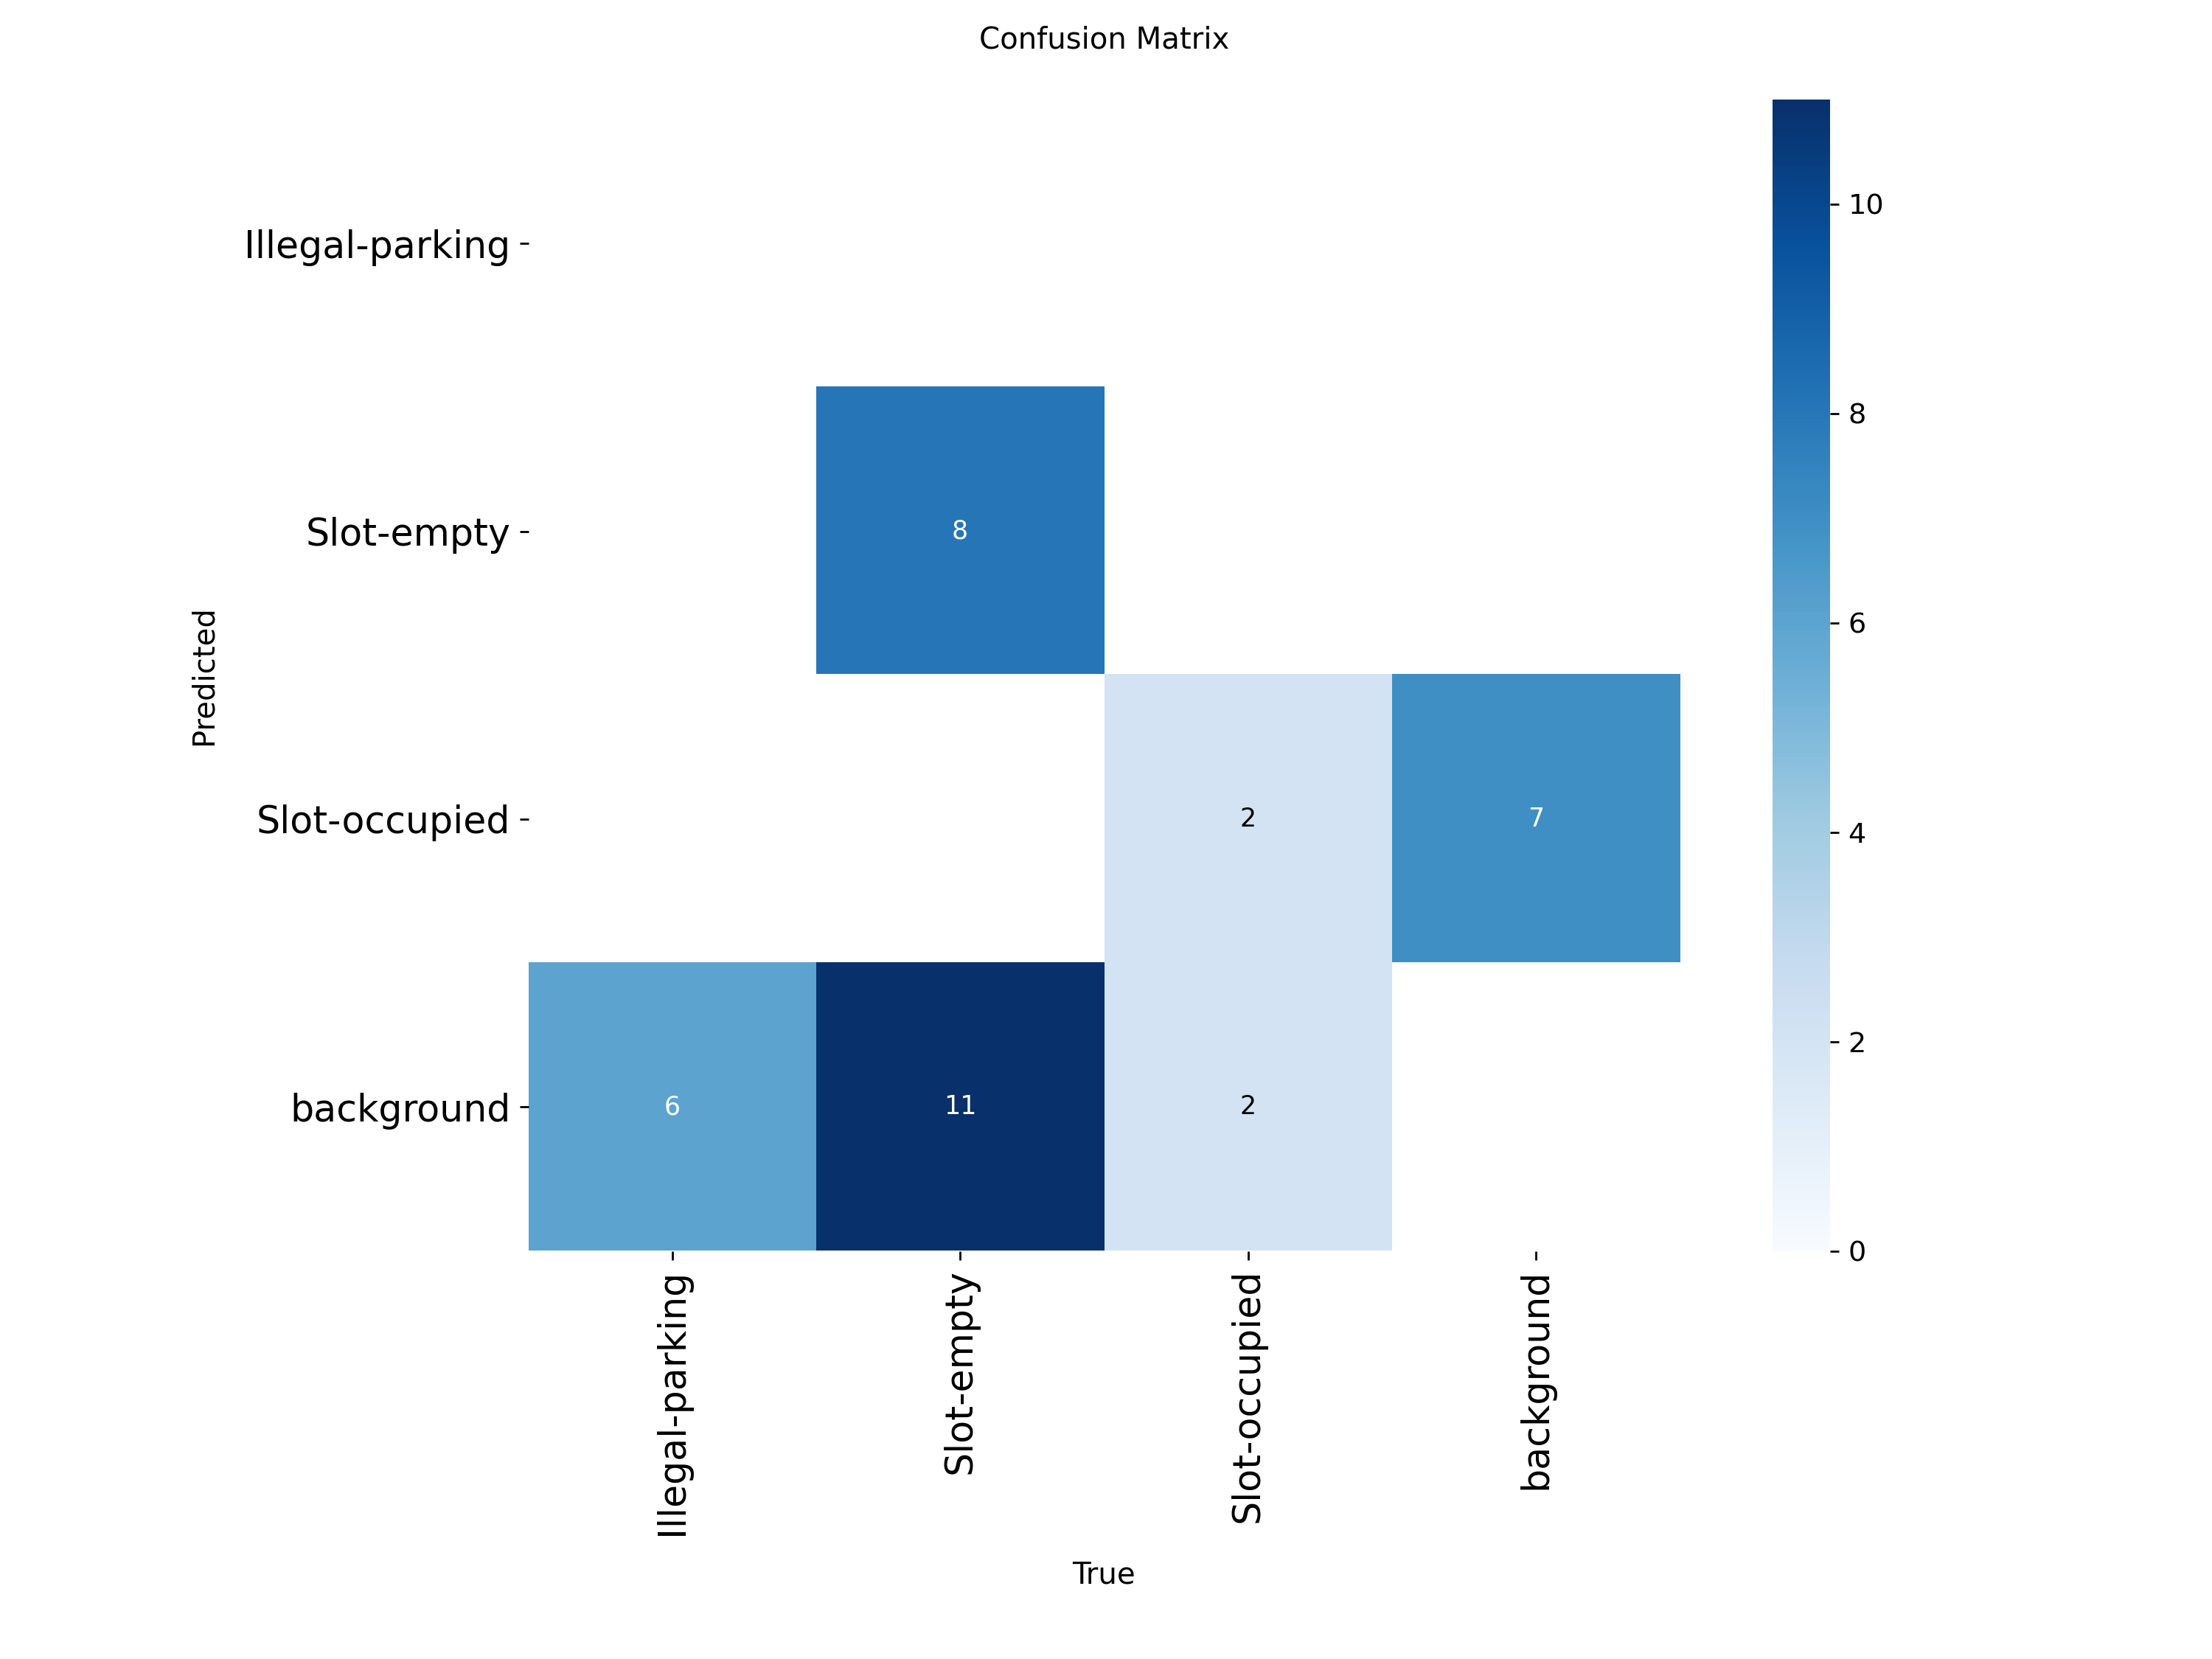


--- Training Curves (De leercurve) ---


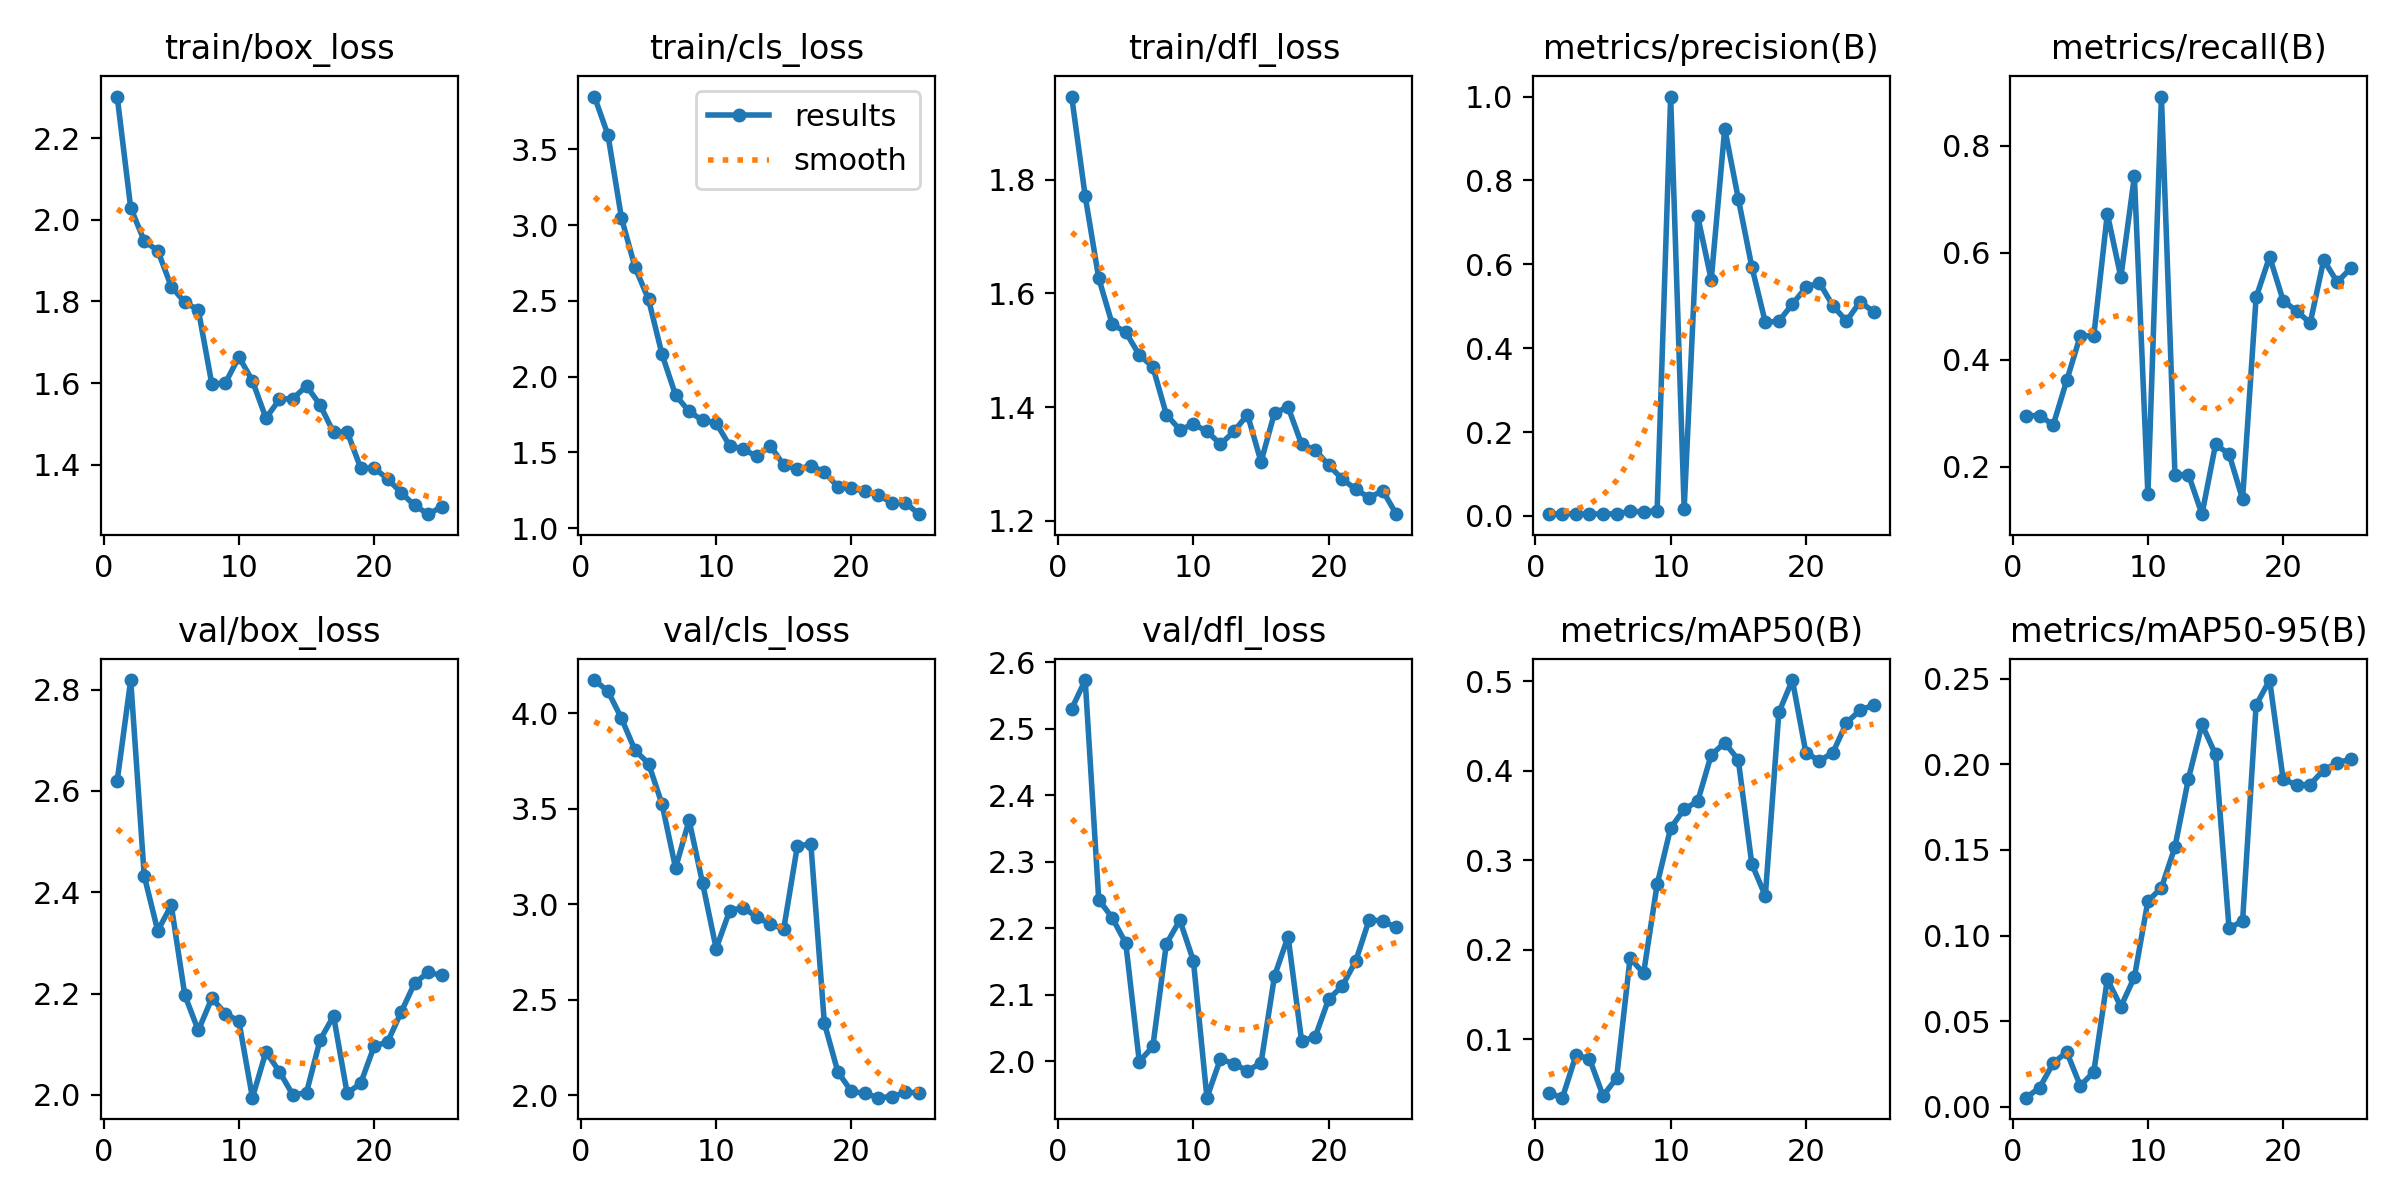

In [9]:
from IPython.display import Image, display
from pathlib import Path

# Het pad naar jouw laatste training (check even of dit train2 of train is)
save_dir = Path('/Users/merlijne/Documents/Studie/Master_DS/DSP/Project5DSP/runs/detect/train2')

print("--- Confusion Matrix (Waar de AI de mist in gaat) ---")
if (save_dir / 'confusion_matrix.png').exists():
    display(Image(filename=str(save_dir / 'confusion_matrix.png'), width=800))

print("\n--- Training Curves (De leercurve) ---")
if (save_dir / 'results.png').exists():
    display(Image(filename=str(save_dir / 'results.png'), width=800))

In [13]:

data = {
    'Folder': ['case_1', 'case_2', 'case_3', 'case_4', 'case_5', 'case_6', 'case_7'],
    'Case_ID': ['JB.24.014385.001', 'JB.24.014385.002', 'JB.24.015378.001', 'JB.25.000105.001', 'JB.24.015521.001', 'JB.24.015612.001', 'JB.25.002050.001'],
    'Wetsartikel': ['Art. 26 RVV (E6)', 'Art. 26 RVV (E6)', 'Art. 24 RVV (E7)', 'Art. 26 RVV (E6)', 'Art. 24 RVV (E7)', 'Art. 10 RVV (G7)', 'Art. 10 RVV (G7)'],
    'Type': ['Invalide', 'Invalide Gereserveerd', 'Laden/Lossen', 'Invalide Gereserveerd', 'Laden/Lossen', 'Voetgangers/Markt', 'Voetgangersgebied']
}

df = pd.DataFrame(data)

# Check of de mapjes bestaan en tel de foto's
pad_naar_fotos = "data/nederlandse_overtredingen" # Pas dit aan naar jouw mappad

def tel_fotos(row):
    map_pad = os.path.join(pad_naar_fotos, row['Folder'])
    if os.path.exists(map_pad):
        return len([f for f in os.listdir(map_pad) if f.endswith(('.jpg', '.jpeg', '.png'))])
    return 0

df['Aantal_Fotos'] = df.apply(tel_fotos, axis=1)

# Opslaan als CSV
df.to_csv('overtredingen_dataset.csv', index=False)

print("--- Dataset Overzicht ---")
print(df[['Folder', 'Wetsartikel', 'Aantal_Fotos']])

--- Dataset Overzicht ---
   Folder       Wetsartikel  Aantal_Fotos
0  case_1  Art. 26 RVV (E6)             2
1  case_2  Art. 26 RVV (E6)             1
2  case_3  Art. 24 RVV (E7)             1
3  case_4  Art. 26 RVV (E6)             2
4  case_5  Art. 24 RVV (E7)             2
5  case_6  Art. 10 RVV (G7)             1
6  case_7  Art. 10 RVV (G7)             1


In [22]:
import os
import shutil

# 1. Check waar we nu zijn
print(f"Huidige werkmap: {os.getcwd()}")

# 2. Test welk pad werkt
pad_opties = [
    "data/nederlandse_overtredingen",
    "code/data/nederlandse_overtredingen",
    "./data/nederlandse_overtredingen"
]

base_path = None
for optie in pad_opties:
    if os.path.exists(os.path.join(optie, "case_1")):
        base_path = optie
        print(f"✅ Gevonden! We gebruiken: {base_path}")
        break

if not base_path:
    print("❌ ERROR: Kan de mappen 'case_1', 'case_2' etc. nergens vinden.")
else:
    # 3. Voer nu pas het kopiëren uit
    train_dir = os.path.join(base_path, "train/images")
    val_dir = os.path.join(base_path, "val/images")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    count = 0
    for i in range(1, 11):
        case_folder = f"case_{i}"
        source_path = os.path.join(base_path, case_folder)
        target_dir = train_dir if i <= 8 else val_dir
        
        if os.path.exists(source_path):
            images = [f for f in os.listdir(source_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            for img in images:
                shutil.copy(os.path.join(source_path, img), os.path.join(target_dir, img))
                count += 1
                print(f"📸 Gekopieerd: {case_folder}/{img}")

    print(f"\n🎉 Succes! Totaal {count} foto's staan nu in de YOLO-structuur.")

Huidige werkmap: /Users/merlijne/Documents/Studie/Master_DS/DSP/Project5DSP/image-classifier-web/code
✅ Gevonden! We gebruiken: data/nederlandse_overtredingen
📸 Gekopieerd: case_1/picture_2.png
📸 Gekopieerd: case_1/picture_1.png
📸 Gekopieerd: case_2/picture_3.png
📸 Gekopieerd: case_3/picture_4.png
📸 Gekopieerd: case_4/picture_5.png
📸 Gekopieerd: case_4/picture_6.png
📸 Gekopieerd: case_5/picture_8.png
📸 Gekopieerd: case_5/picture_7.png
📸 Gekopieerd: case_6/picture_9.png
📸 Gekopieerd: case_7/picture_10.png
📸 Gekopieerd: case_8/picture_11.png
📸 Gekopieerd: case_9/picture_12.png
📸 Gekopieerd: case_9/picture_13.png
📸 Gekopieerd: case_10/picture_14.png

🎉 Succes! Totaal 14 foto's staan nu in de YOLO-structuur.


In [23]:

classes = ['car-in-box', 'charging-cable', 'trunk-open', 'disabled-card', 'covered-sign']

yaml_content = f"""
path: /Users/merlijne/Documents/Studie/Master_DS/DSP/Project5DSP/data/nederlandse_overtredingen
train: train/images
val: val/images

names:
  0: car-in-box
  1: charging-cable
  2: trunk-open
  3: disabled-card
  4: covered-sign
"""

# Schrijf het YAML bestand lokaal op je schijf
with open('nederlandse_wetgeving.yaml', 'w') as f:
    f.write(yaml_content)

print("✅ YAML-bestand aangemaakt voor omschrijvende AI-training.")

✅ YAML-bestand aangemaakt voor omschrijvende AI-training.
